# Titanic Dataset : Data Analysis and Visualization

In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some Data analysis and visualization at this stage.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns

In [3]:
Data = sns.load_dataset('titanic')

Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#  Data Pre-Processing

In [4]:
Data.info(verbose=False)  # total 891 rows  and 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 15 entries, survived to alone
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
Data.isnull()['deck'].value_counts()         # checking for null values in deck column

True     688
False    203
Name: deck, dtype: int64

In [6]:
empty = Data.isnull()

empty.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [7]:
for column in empty.columns.values.tolist():
    print(column)
    print(empty[column].value_counts())
    print()

survived
False    891
Name: survived, dtype: int64

pclass
False    891
Name: pclass, dtype: int64

sex
False    891
Name: sex, dtype: int64

age
False    714
True     177
Name: age, dtype: int64

sibsp
False    891
Name: sibsp, dtype: int64

parch
False    891
Name: parch, dtype: int64

fare
False    891
Name: fare, dtype: int64

embarked
False    889
True       2
Name: embarked, dtype: int64

class
False    891
Name: class, dtype: int64

who
False    891
Name: who, dtype: int64

adult_male
False    891
Name: adult_male, dtype: int64

deck
True     688
False    203
Name: deck, dtype: int64

embark_town
False    889
True       2
Name: embark_town, dtype: int64

alive
False    891
Name: alive, dtype: int64

alone
False    891
Name: alone, dtype: int64



In [8]:
Data.dropna(axis=0,inplace=True)

In [9]:
Data.info(verbose=False)  # after deleting rows became 182

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Columns: 15 entries, survived to alone
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [10]:
Data.drop_duplicates(inplace=True)

### Data Formatting

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     181 non-null    int64   
 1   pclass       181 non-null    int64   
 2   sex          181 non-null    object  
 3   age          181 non-null    float64 
 4   sibsp        181 non-null    int64   
 5   parch        181 non-null    int64   
 6   fare         181 non-null    float64 
 7   embarked     181 non-null    object  
 8   class        181 non-null    category
 9   who          181 non-null    object  
 10  adult_male   181 non-null    bool    
 11  deck         181 non-null    category
 12  embark_town  181 non-null    object  
 13  alive        181 non-null    object  
 14  alone        181 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.1+ KB


In [12]:
Data['age'].dtype

dtype('float64')

In [13]:
Data['age'].head()

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
Name: age, dtype: float64

In [14]:
# Here Data type of age is float but we want it as Integer

In [15]:
Data['age'] = Data['age'].astype('int')

In [16]:
Data['age'].dtype

dtype('int32')

In [17]:
Data['age'].head()

1     38
3     35
6     54
10     4
11    58
Name: age, dtype: int32

In [18]:
Data['adult_male'].describe()

count       181
unique        2
top       False
freq         94
Name: adult_male, dtype: object

In [19]:
Data['adult_male'] = Data['adult_male'].astype('int32')

In [20]:
Data['adult_male'].head()

1     0
3     0
6     1
10    0
11    0
Name: adult_male, dtype: int32

### Data Normalizing 
##### (gives values between 0 and 1)

  Data Normalization can done in 3 ways-

* 1)Simple Feature Scaling     
* 2)Min-Max
* 3)Z-Score Normalizing

          1) xnew=xold/xmax
          2) xnew=(xold-xmin)/(xmax-xmin)
          3) xnew=(xold-mu)/sigma

* Normalization is important because if we want to compare the features,where one of them has large values & other has small values then the large values will have more impact on smaller values while plotting.

* so, we  Normalize both columns values ranges between  to 1 then it is to compare


In [21]:
                                # SIMPLE FEATURE SCALING

In [22]:
Data['SFS'] = Data['fare']/Data['fare'].max()

In [23]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,SFS
1,1,1,female,38,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0.139136
3,1,1,female,35,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0.103644
6,0,1,male,54,0,0,51.8625,S,First,man,1,E,Southampton,no,True,0.101229
10,1,3,female,4,1,1,16.7000,S,Third,child,0,G,Southampton,yes,False,0.032596
11,1,1,female,58,0,0,26.5500,S,First,woman,0,C,Southampton,yes,True,0.051822


In [24]:
                         # MIN-MAX Normalization

In [25]:
xmin = Data['fare'].min()

xmax = Data['fare'].max()

In [26]:
Data['MIN_MAX'] = (Data['fare']-xmin)/(xmax-xmin)

In [27]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,SFS,MIN_MAX
1,1,1,female,38,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0.139136,0.139136
3,1,1,female,35,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0.103644,0.103644
6,0,1,male,54,0,0,51.8625,S,First,man,1,E,Southampton,no,True,0.101229,0.101229
10,1,3,female,4,1,1,16.7000,S,Third,child,0,G,Southampton,yes,False,0.032596,0.032596
11,1,1,female,58,0,0,26.5500,S,First,woman,0,C,Southampton,yes,True,0.051822,0.051822


In [28]:
                                # Z-Score Normalization

In [29]:
x_mean = Data['fare'].mean()

x_std = Data['fare'].std()

In [30]:
Data['Z_Score'] = (Data['fare'] - x_mean)/x_std

In [31]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,SFS,MIN_MAX,Z_Score
1,1,1,female,38,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0.139136,0.139136,-0.100256
3,1,1,female,35,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0.103644,0.103644,-0.337328
6,0,1,male,54,0,0,51.8625,S,First,man,1,E,Southampton,no,True,0.101229,0.101229,-0.353462
10,1,3,female,4,1,1,16.7000,S,Third,child,0,G,Southampton,yes,False,0.032596,0.032596,-0.811906
11,1,1,female,58,0,0,26.5500,S,First,woman,0,C,Southampton,yes,True,0.051822,0.051822,-0.683483


## Binning

* Turning numerical values into Categories

In [32]:
Bins = np.linspace(Data['fare'].min(),Data['fare'].max(),4)

Bins

array([  0.    , 170.7764, 341.5528, 512.3292])

In [33]:
group_labels = ["Low","Medium","High"]

In [34]:
Data['Bins'] = pd.cut(Data['fare'],Bins,labels=group_labels,include_lowest=True)

Data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,SFS,MIN_MAX,Z_Score,Bins
1,1,1,female,38,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0.139136,0.139136,-0.100256,Low
3,1,1,female,35,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0.103644,0.103644,-0.337328,Low
6,0,1,male,54,0,0,51.8625,S,First,man,1,E,Southampton,no,True,0.101229,0.101229,-0.353462,Low
10,1,3,female,4,1,1,16.7000,S,Third,child,0,G,Southampton,yes,False,0.032596,0.032596,-0.811906,Low
11,1,1,female,58,0,0,26.5500,S,First,woman,0,C,Southampton,yes,True,0.051822,0.051822,-0.683483,Low
21,1,2,male,34,0,0,13.0000,S,Second,man,1,D,Southampton,yes,True,0.025374,0.025374,-0.860147,Low
23,1,1,male,28,0,0,35.5000,S,First,man,1,A,Southampton,yes,True,0.069291,0.069291,-0.566794,Low
27,0,1,male,19,3,2,263.0000,S,First,man,1,C,Southampton,no,False,0.513342,0.513342,2.399324,Medium
52,1,1,female,49,1,0,76.7292,C,First,woman,0,D,Cherbourg,yes,False,0.149765,0.149765,-0.029253,Low
54,0,1,male,65,0,1,61.9792,C,First,man,1,B,Cherbourg,no,False,0.120975,0.120975,-0.221562,Low


### Turning Categorical Data into numerical

In [35]:
Data['sex']

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: sex, Length: 181, dtype: object

In [36]:
MandF = pd.get_dummies(Data['sex'])

MandF

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [37]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,SFS,MIN_MAX,Z_Score,Bins
1,1,1,female,38,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,False,0.139136,0.139136,-0.100256,Low
3,1,1,female,35,1,0,53.1000,S,First,woman,0,C,Southampton,yes,False,0.103644,0.103644,-0.337328,Low
6,0,1,male,54,0,0,51.8625,S,First,man,1,E,Southampton,no,True,0.101229,0.101229,-0.353462,Low
10,1,3,female,4,1,1,16.7000,S,Third,child,0,G,Southampton,yes,False,0.032596,0.032596,-0.811906,Low
11,1,1,female,58,0,0,26.5500,S,First,woman,0,C,Southampton,yes,True,0.051822,0.051822,-0.683483,Low


In [38]:
Data = pd.concat([Data,MandF],axis=1)

In [39]:
Data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,SFS,MIN_MAX,Z_Score,Bins,female,male
1,1,1,female,38,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,0.139136,0.139136,-0.100256,Low,1,0
3,1,1,female,35,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,0.103644,0.103644,-0.337328,Low,1,0
6,0,1,male,54,0,0,51.8625,S,First,man,...,E,Southampton,no,True,0.101229,0.101229,-0.353462,Low,0,1
10,1,3,female,4,1,1,16.7000,S,Third,child,...,G,Southampton,yes,False,0.032596,0.032596,-0.811906,Low,1,0
11,1,1,female,58,0,0,26.5500,S,First,woman,...,C,Southampton,yes,True,0.051822,0.051822,-0.683483,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47,1,1,52.5542,S,First,woman,...,D,Southampton,yes,False,0.102579,0.102579,-0.344444,Low,1,0
872,0,1,male,33,0,0,5.0000,S,First,man,...,B,Southampton,no,True,0.009759,0.009759,-0.964450,Low,0,1
879,1,1,female,56,0,1,83.1583,C,First,woman,...,C,Cherbourg,yes,False,0.162314,0.162314,0.054569,Low,1,0
887,1,1,female,19,0,0,30.0000,S,First,woman,...,B,Southampton,yes,True,0.058556,0.058556,-0.638503,Low,1,0


# Data Visualization

Tools are:

* Matplotlib
* Seaborn
* Plotly

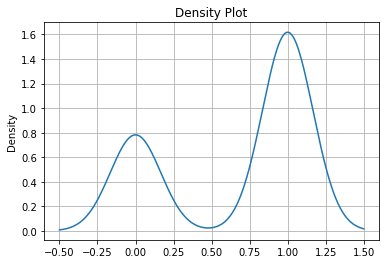

In [40]:
Data['survived'].plot(kind='kde',grid='darkgrid',title='Density Plot')

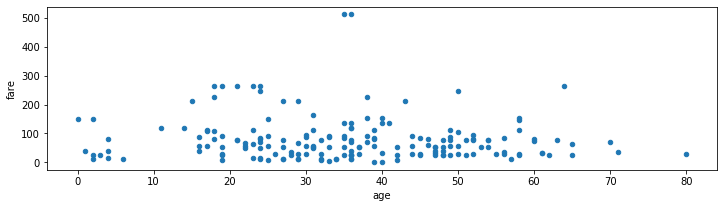

In [41]:
Data.plot(x='age',y='fare',kind='scatter',figsize=(12,3))

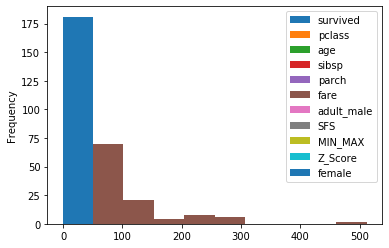

In [42]:
Data.plot(x='male',kind='hist')

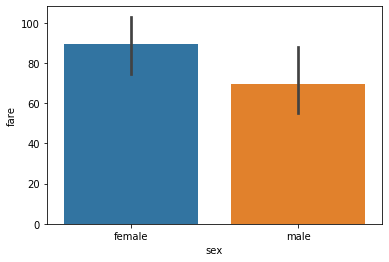

In [43]:
sns.barplot(x='sex',y='fare',data=Data)

In [44]:
import cufflinks as cf

In [45]:
from plotly.offline import init_notebook_mode,plot,iplot,download_plotlyjs

In [46]:
init_notebook_mode(connected=True)

In [47]:
cf.go_offline()

In [48]:
Data['fare'].iplot(kind='hist',mode='markers',theme='pearl',color='green')

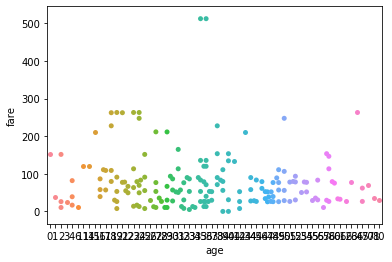

In [49]:
sns.swarmplot(x=Data['age'],y=Data['fare'])

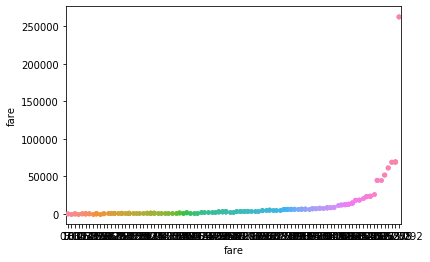

In [50]:
sns.stripplot(x=Data['fare'],y=Data['fare']**2)

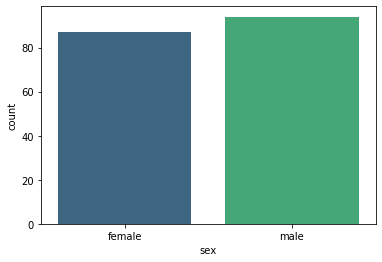

In [51]:
sns.countplot(x=Data['sex'],palette='viridis')

In [52]:
Data['deck'].iplot(kind='hist')

In [53]:
Data.iplot(kind='bubble',x='fare',y='age',size='survived')

In [54]:
Data[['fare','age']].iplot(kind='surface')

# Explorary Data Analysis

 In this section, we will explore several methods to see if certain characteristics or features can be used to predict survival of passengers.

We'll try to answer the following questions:

* How many people are survived from male and female?

* Who paid the highest fare of male and female and from which class?

* What deck were the passengers on and how does that relate to their class?

* Who was alone and who was with family?

* What factors helped someone survive the sinking?

## Descriptive Statistics

There are 3 types of stats-
        
        1)Descriptive Statistics
        2)Predictive Statistics
        3)Prescriptive Statistics

Descriptive stats is nothing but it gives description about our data.Gives 5 points summary-

                1)Minimum Value of a feature
                2)Lower Quartile range(Q1) i.e 25% (25% are of below this value and 75% are above)
                3)Median(Q2) i.e 50%
                4)Upper Quartile Range(Q3) i.e 75% (75% are of below this value and 25% are above)
                5)Maximum value of a feature
 and also gives Mean,Standard Deviation and Count

In [96]:
Data.describe()

,survived,pclass,age,sibsp,parch,fare,adult_male,SFS,MIN_MAX,Z_Score,female,male,FamilyCount
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02,181.000000,181.000000,181.000000
mean,0.674033,1.193370,35.674033,0.469613,0.480663,78.972883,0.480663,0.154145,0.154145,1.275836e-16,0.480663,0.519337,0.950276
std,0.470035,0.517644,15.701339,0.645854,0.757123,76.699584,0.501012,0.149708,0.149708,1.000000e+00,0.501012,0.501012,1.111936
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.029639e+00,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000,0.057971,0.057971,-6.424140e-01,0.000000,0.000000,0.000000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,0.000000,0.111257,0.111257,-2.864798e-01,0.000000,1.000000,1.000000
75%,1.000000,1.000000,48.000000,1.000000,1.000000,90.000000,1.000000,0.175668,0.175668,1.437702e-01,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000,5.650048e+00,1.000000,1.000000,5.000000


* For a categorical description we need to add include='all' parameter.
* It adds unique,top,frequency rows.

In [97]:
Data.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,SFS,MIN_MAX,Z_Score,Bins,female,male,FamilyCount
count,181.000000,181.000000,181,181.000000,181.000000,181.000000,181.000000,181,181,181,...,181,181,181,181.000000,181.000000,1.810000e+02,181,181.000000,181.000000,181.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,...,3,2,2,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,First,man,...,Southampton,yes,False,NaN,NaN,NaN,Low,NaN,NaN,NaN
freq,NaN,NaN,94,NaN,NaN,NaN,NaN,115,156,87,...,115,122,104,NaN,NaN,NaN,165,NaN,NaN,NaN
mean,0.674033,1.193370,NaN,35.674033,0.469613,0.480663,78.972883,NaN,NaN,NaN,...,NaN,NaN,NaN,0.154145,0.154145,1.275836e-16,NaN,0.480663,0.519337,0.950276
std,0.470035,0.517644,NaN,15.701339,0.645854,0.757123,76.699584,NaN,NaN,NaN,...,NaN,NaN,NaN,0.149708,0.149708,1.000000e+00,NaN,0.501012,0.501012,1.111936
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,-1.029639e+00,NaN,0.000000,0.000000,0.000000
25%,0.000000,1.000000,NaN,24.000000,0.000000,0.000000,29.700000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.057971,0.057971,-6.424140e-01,NaN,0.000000,0.000000,0.000000
50%,1.000000,1.000000,NaN,36.000000,0.000000,0.000000,57.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.111257,0.111257,-2.864798e-01,NaN,0.000000,1.000000,1.000000
75%,1.000000,1.000000,NaN,48.000000,1.000000,1.000000,90.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.175668,0.175668,1.437702e-01,NaN,1.000000,1.000000,1.000000


<h2 id="pattern_visualization">Analyzing Individual Feature Patterns using Visualization</h2>

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [56]:
# list the data types for each column
print(Data.dtypes)

survived          int64
pclass            int64
sex              object
age               int32
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male        int32
deck           category
embark_town      object
alive            object
alone              bool
SFS             float64
MIN_MAX         float64
Z_Score         float64
Bins           category
female            uint8
male              uint8
dtype: object


 we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [57]:
Corr = Data[['survived','pclass','sex','age','sibsp','parch','fare','adult_male','alone']].corr()

Corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.036331,-0.248588,0.104444,0.021217,0.131294,-0.581307,-0.116830
pclass,-0.036331,1.000000,-0.307994,-0.106957,0.045032,-0.317192,-0.124741,0.067335
age,-0.248588,-0.307994,1.000000,-0.157392,-0.273688,-0.091250,0.335710,0.209180
sibsp,0.104444,-0.106957,-0.157392,1.000000,0.251580,0.284762,-0.152055,-0.627390
parch,0.021217,0.045032,-0.273688,0.251580,1.000000,0.388547,-0.187725,-0.547780
fare,0.131294,-0.317192,-0.091250,0.284762,0.388547,1.000000,-0.115110,-0.298543
adult_male,-0.581307,-0.124741,0.335710,-0.152055,-0.187725,-0.115110,1.000000,0.201049
alone,-0.116830,0.067335,0.209180,-0.627390,-0.547780,-0.298543,0.201049,1.000000


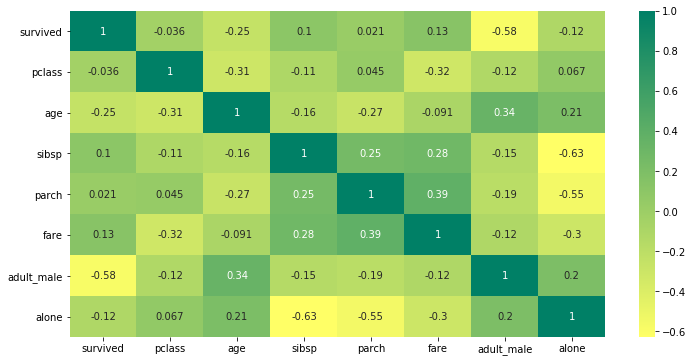

In [58]:
plt.figure(figsize=(12,6))        
sns.heatmap(Corr,annot=True,cmap='summer_r')      # values closest to 1 are good correlation

<p>The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook.</p>

In [59]:
Data[['survived','pclass','age','fare']].corr()

,survived,pclass,age,fare
survived,1.000000,-0.036331,-0.248588,0.131294
pclass,-0.036331,1.000000,-0.307994,-0.317192
age,-0.248588,-0.307994,1.000000,-0.091250
fare,0.131294,-0.317192,-0.091250,1.000000


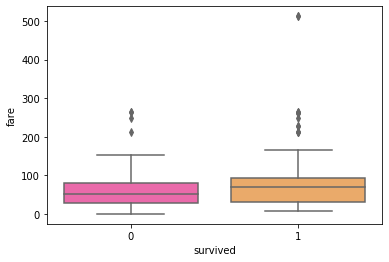

In [60]:
sns.boxplot(x=Data['survived'],y=Data['fare'],palette='spring')

# Weak Linear Relationship
Let's see if "age" as a predictor variable of "fare".

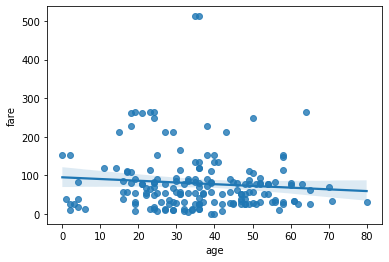

In [61]:
sns.regplot(x='age',y='fare',data=Data)   # There is a weak relatioonship between age and fare

age does not seem like a good predictor of the fare at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

Let's look at some demographical information about the passengers.

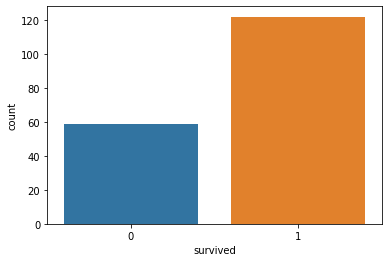

In [62]:
sns.countplot('survived',data=Data)

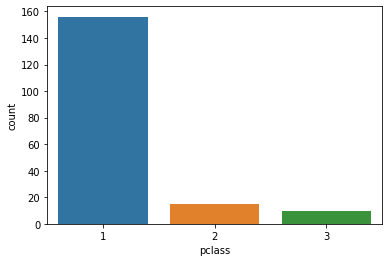

In [63]:
sns.countplot('pclass',data=Data)

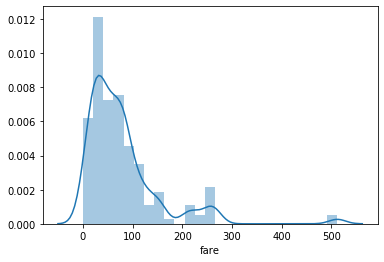

In [64]:
sns.distplot(Data['fare'], kde=True)

#  1) How many people are survived from male and female 

In [65]:
Data.iplot(kind='bar',x='sex',y='survived')

In [66]:
import plotly.express as px

fig = px.pie(Data,names='sex',values='survived') 
iplot(fig)

<p> Red color shows Percentage of Survived Male and Blue color shows Percentage of Female Survived. 66% of Females are survived i.e 82 females and only 33.3% males are survived i.e  41 males.</p>

#  2) Who paid the highest fare of male and female and from which class

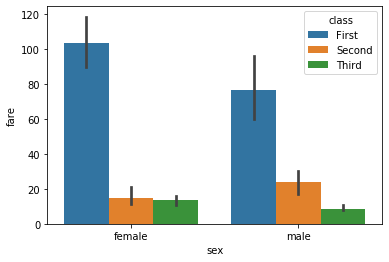

In [67]:
sns.barplot(x=Data['sex'],y=Data['fare'],hue=Data['class'])

From this we can conclude that Females of First Class paid highest fare among Second and Third Class people..Second Class Males paid greater than Secon Class Females..Whereas Males of Third class paid lesser than Females of Third Class

# 3) What deck were the passengers on and how does that relate to their class?

In [68]:
Data['deck'].dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False)

Now converting Categories to object type for our convenience

In [69]:
Data['deck'].astype('str')

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: deck, Length: 181, dtype: object

* Grouping Deck Categories and accessing count of each feature

In [70]:
Grouping = Data.groupby('deck').count()

Grouping

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,SFS,MIN_MAX,Z_Score,Bins,female,male
deck,,,,,,,,,,,,,,,,,,,,
A,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
B,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
C,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
D,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
E,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
F,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [71]:
Grouping.stack()['A']['fare'].mean()

12.0

Everything seems to work, so now we can check out how many passengers belonged to different decks.

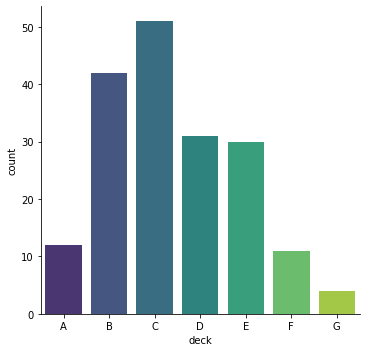

In [72]:
sns.catplot('deck',kind='count',data=Data,palette='viridis')

In [73]:
Data['deck'].value_counts()

C    51
B    42
D    31
E    30
A    12
F    11
G     4
Name: deck, dtype: int64

C:\Users\SURYA\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



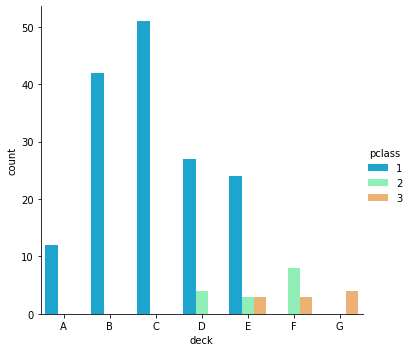

In [74]:
sns.factorplot(x='deck',kind='count',hue='pclass',data = Data,palette='rainbow')

It meant that passengers of first class are assigned to decks A,B,C,D,E and A,B,C decks have only first class passengers and deck C have more number of first class passengers..

Second class passengers are placed in D,E,F decks & deck D shared by first class and second class passengers,Whereas passengers of third class are started from deck E to G with less count..

# 4) Who was alone and who was with family?

In [75]:
Data.head()[['sibsp','parch','alone']]

,sibsp,parch,alone
1,1,0,False
3,1,0,False
6,0,0,True
10,1,1,False
11,0,0,True


Here sibsP attribute refers to the number of siblings or spouses that a passenger had aboard. parch refers to the number of

parents or children someone had on the ship..If both sibsp and parch are zero,it represents that the passenger is alone i.e 

False Otherwise True. 

* To want no. of relatives are there for a passenger, We add new column  with (sibsp + parch) values

In [76]:
Data['FamilyCount'] = Data['sibsp']+Data['parch']

In [77]:
Data[['sibsp','parch','FamilyCount']]

,sibsp,parch,FamilyCount
1,1,0,1
3,1,0,1
6,0,0,0
10,1,1,2
11,0,0,0
...,...,...,...
871,1,1,2
872,0,0,0
879,0,1,1
887,0,0,0


C:\Users\SURYA\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



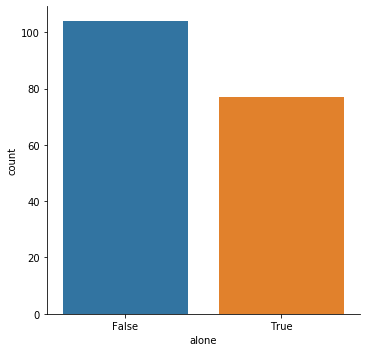

In [78]:
sns.factorplot('alone',kind='count',data=Data)

By this we can say that,the majority of people on the ship had family on the ship.

#  5) Which factors affects survival of a passenger in the ship ?

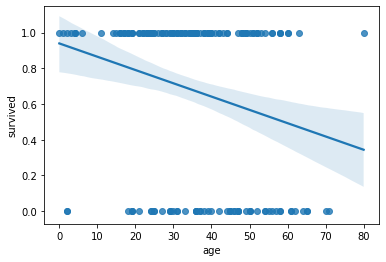

In [79]:
sns.regplot(x=Data['age'],y=Data['survived'])

 As the age incereases there is less likely to survive in the ship

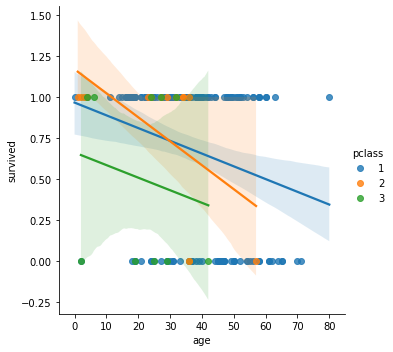

In [80]:
sns.lmplot(x='age',y='survived',data=Data,hue='pclass')

C:\Users\SURYA\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



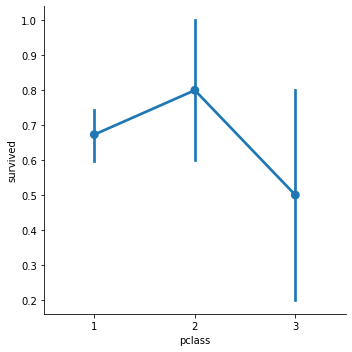

In [81]:
sns.factorplot('pclass','survived',data=Data)

C:\Users\SURYA\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



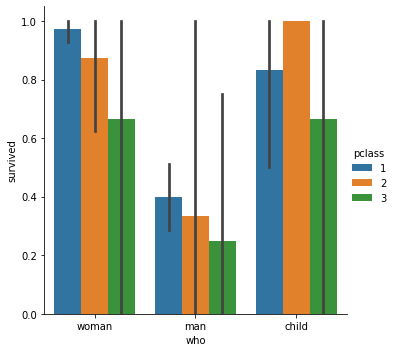

In [82]:
sns.factorplot('who','survived',kind='bar',hue='pclass',data=Data)

It gives much clarity that Men have lower chance of survival than woman and child.

We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

### Correlation and Causation
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

* 1: Total positive linear correlation.
* 0: No linear correlation, the two variables most likely do not affect each other.
* -1: Total negative linear correlation.


<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>

P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

* p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
* the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
* the p-value is  <  0.1: there is weak evidence that the correlation is significant.
* the p-value is  >  0.1: there is no evidence that the correlation is significant.

 We can obtain this information using  "stats" module in the "scipy"  library.

In [83]:
from scipy import stats

<h3>Age vs Survived</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'age' and 'survived':

In [84]:
pearson_coef, p_value = stats.pearsonr(Data['age'], Data['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.24858770118649548  with a P-value of P = 0.0007398697980718643


<h5>Conclusion:</h5>

Since the p-value is  <  0.001, the correlation between age and survived is statistically significant,and the coefficient of ~ -0.248 shows that the relationship is negative and moderately strong.

We can relate the process for each 'pclass' and 'survived':

### Pclass vs Survived

In [85]:
pearson_coef, p_value = stats.pearsonr(Data['pclass'], Data['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.03633117508192425  with a P-value of P = 0.6272791925429348


<h5>Conclusion:</h5>

Since the p-value is  >  0.1, there is no evidence that the correlation between pclass and survived is significant ,and the coefficient of ~ -0.036 shows that the relationship is negative and not strong.

### Alone vs Survived

In [86]:
pearson_coef, p_value = stats.pearsonr(Data['alone'], Data['survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.11683034695589871  with a P-value of P = 0.11728529404640024


## * ANOVA
<h3>ANOVA: Analysis of Variance</h3>

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our survived variable is strongly correlated with the variable we are analyzing, expect ANOVA

In [87]:
grouped_test2=Data[['sex', 'survived']].groupby(['sex'])
grouped_test2.head(2)

,sex,survived
1,female,1
3,female,1
6,male,0
21,male,1


In [88]:
grouped_test2.get_group('male')['survived']

6      0
21     1
23     1
27     0
54     0
      ..
806    0
857    1
867    0
872    0
889    1
Name: survived, Length: 94, dtype: int64

we can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [89]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('male')['survived'], grouped_test2.get_group('female')['survived'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 69.00221234548374 , P = 2.361887616639924e-14


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. Let's see remaining Categorical variables are all highly correlated or not?

In [90]:
grouped_test3 = Data[['deck','survived']].groupby('deck')

grouped_test3.head()

,deck,survived
1,C,1
3,C,1
6,E,0
10,G,1
11,C,1
21,D,1
23,A,1
27,C,0
52,D,1
54,B,0


In [91]:
grouped_test3.get_group('C')['survived'].head()

1     1
3     1
11    1
27    0
62    0
Name: survived, dtype: int64

In [92]:
#Annova

f_score,P_val = stats.f_oneway(grouped_test3.get_group('A')['survived'],grouped_test3.get_group('B')['survived'],grouped_test3.get_group('C')['survived'])

print("ANOVA results: F=", f_score, ", P =", P_val)

ANOVA results: F= 1.2499955088475705 , P = 0.2908572213669111


<h3>Conclusion:</h3>

F_Score_Val is very small it states that varaiance between two groups are small,and correlation od decks A,B,C and survived is low. 

In [93]:
#Annova

f_score,P_val = stats.f_oneway(grouped_test3.get_group('D')['survived'],grouped_test3.get_group('E')['survived'],grouped_test3.get_group('F')['survived'])

print("ANOVA results: F=", f_score, ", P =", P_val)

ANOVA results: F= 0.2328582329536164 , P = 0.7928859320808783


In [94]:
#Annova

f_score,P_val = stats.f_oneway(grouped_test3.get_group('B')['survived'],grouped_test3.get_group('F')['survived'])

print("ANOVA results: F=", f_score, ", P =", P_val)

ANOVA results: F= 0.43142713810309774 , P = 0.5142426691783714


## CONCLUSION:


* In this module we learnt : 
            
            1)Importing Libraries and Titanic Data from Seaborn built-in datasets.
            2)Data Pre-processing techniques like -
                    * Dealing with null values.
                    * Data Formatting
                    * Data Normalizing
                    * Binning
                    * Turning Categorical data into Numerical
            3)Data Visualization tools like-
                    * Matplotlib
                    * Seaborn
                    * Plotly
            4)Exploratory Data Analysis-
                    * Describing Data
                    * Box plotting
                    * Asking Some questions like-
                          1) How many people are survived from male and female?
                          2) Who paid the highest fare of male and female and from which class?
                          3) What deck were the passengers on and how does that relate to their class? 
                          4) Who was alone and who was with family?
                          5) Which factors affects survival of a passenger in the ship ?
                          
                    * Correaltion
                    * Correlation-Statistics
                    * Analysis of Variance
                    
* We also learned that correlation methods like anova and pearsonr having in a python stats package. 


* From this we know that to correlate categorical variable with numerical continous variable general pearsonr cannot be calculated.pearsonr calculates between two numerical variables.


* So,we then used analysis of variance of f-test score to correlate categorical and numerical variable...


* By all this we can conclude that categorical variable 'sex' is highly correlated with survival of passengers and fare is correlated with age.